In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import tree

#Temperature=K,Absolute_Magnitude=A_M,Luminosity=L,Radius=R
#Color,Spectral_Class,Type
#load dataset
data = pd.read_csv("Stars.csv", sep=",")
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [28]:
labels = set(data['Type'])

In [29]:
print(data.dtypes)

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object


In [30]:
data['Type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

In [31]:
x=["Blue-white","Blue White","yellow-white","Blue white","Yellowish White","Blue-White","White-Yellow","Whitish","white"]
for i in x:
    data.loc[data["Color"]==i, "Color"]= "White"

In [32]:
for i in ["yellowish", "Yellowish"]:
    data.loc[data["Color"]==i, "Color"]= "Yellow"

In [33]:
for i in ["Orange-Red", "Pale yellow orange"]:
    data.loc[data["Color"]==i, "Color"]= "Orange"

In [34]:
data["Color"].value_counts()

Red       112
White      65
Blue       56
Orange      4
Yellow      3
Name: Color, dtype: int64

In [35]:
data = pd.get_dummies(data=data, columns=["Color", "Spectral_Class"], drop_first=True)

In [36]:
data

,Temperature,L,R,A_M,Type,Color_Orange,Color_Red,Color_White,Color_Yellow,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,1,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,1,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,1,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,1,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,1,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,1,0,0,0,0,0,0,0


In [37]:
Spec_sum=data[['Spectral_Class_B', 'Spectral_Class_F', 'Spectral_Class_G',
 'Spectral_Class_K', 'Spectral_Class_M', 'Spectral_Class_O']].sum()

Spec_sum

Spectral_Class_B     46
Spectral_Class_F     17
Spectral_Class_G      1
Spectral_Class_K      6
Spectral_Class_M    111
Spectral_Class_O     40
dtype: int64

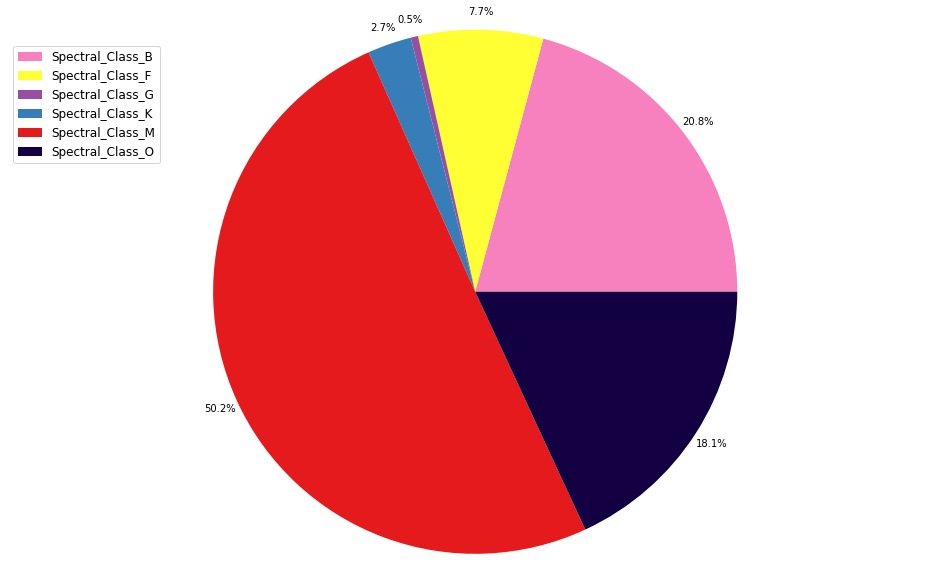

In [38]:
PieLabel = 'Spectral_Class_B', 'Spectral_Class_F', 'Spectral_Class_G', 'Spectral_Class_K', 'Spectral_Class_M', 'Spectral_Class_O' 
Piecolors=['#F781BF','#FFFF33','#984EA3','#377EB8','#E41A1C','#120042'] 


fig2 = plt.figure(figsize=(13, 7))
ax3 = fig2.add_axes([0,0,1,1])
ax3.axis('equal')
ax3.pie(Spec_sum, labels=PieLabel, colors=Piecolors, labeldistance=None, radius=1.3, autopct='%1.1f%%', pctdistance=1.07)
ax3.legend(loc='upper left', fontsize='large')
plt.show()

In [39]:
X = data[['Temperature','L','R','A_M']]
y = data.Type
X

,Temperature,L,R,A_M
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [40]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Type, Length: 240, dtype: int64

In [41]:
clf = tree.DecisionTreeClassifier()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(clf.fit(X_train, y_train))

DecisionTreeClassifier()


In [43]:
clf.feature_importances_

array([0.        , 0.20692068, 0.4083279 , 0.38475142])

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(f_classif,k=2)
select.fit(X,y)

SelectKBest(k=2)

In [45]:
mask = select.get_support()
print(mask)

[False False  True  True]


In [46]:
X_array = X.to_numpy()
X_array.shape

(240, 4)

In [47]:
y_array = y.to_numpy()
y_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int64)

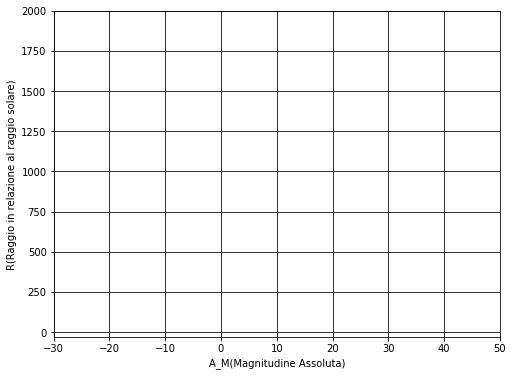

In [48]:
plt.figure(2, figsize=(8, 6))

# Plot the training points
plt.rc('grid', linestyle="-", color='black')
plt.scatter(X_array[:, 0], X_array[:, 1] ,y_array, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('A_M(Magnitudine Assoluta)')
plt.ylabel('R(Raggio in relazione al raggio solare)')

x_min = y_min = -30
x_max = 50
y_max = 2000
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('A_M(Magnitudine Assoluta)')
plt.ylabel('R(Raggio in relazione al raggio solare)')
plt.grid(True)
plt.show()

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=None).fit(X_array)
clusters = kmeans.cluster_centers_
clusters

array([[ 1.53189730e+04,  2.26924865e+05,  5.23745135e+02,
        -7.46337838e+00],
       [ 8.05279870e+03,  7.64907742e+02,  9.71821623e-01,
         1.11645584e+01],
       [ 1.37810000e+04,  5.82875500e+05,  1.08258333e+03,
        -8.67616667e+00],
       [ 1.64864444e+04,  3.54687000e+05,  6.93333333e+02,
        -7.56750000e+00],
       [ 2.55250000e+04,  7.96295333e+05,  6.17833333e+02,
        -7.61500000e+00],
       [ 9.46663158e+03,  1.34305263e+05,  7.74059842e+02,
        -8.28736842e+00]])

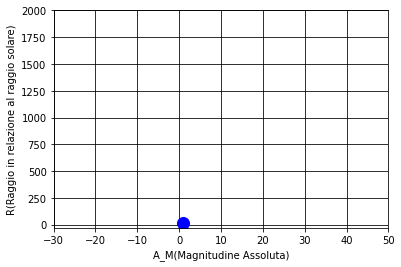

In [50]:
# Plot the training points
plt.rc('grid', linestyle="-", color='black')
plt.scatter(X_array[:, 0], X_array[:, 1] ,y_array, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.plot(clusters[0][0],clusters[0][1],clusters[0][2],clusters[0][3],'bo',markersize=12) 
plt.plot(clusters[1][0],clusters[1][1],clusters[1][2],clusters[1][3],'bo',markersize=12) 
plt.plot(clusters[2][0],clusters[2][1],clusters[2][2],clusters[2][3],'bo',markersize=12) 
plt.plot(clusters[3][0],clusters[3][1],clusters[3][2],clusters[3][3],'bo',markersize=12) 
plt.plot(clusters[4][0],clusters[4][1],clusters[4][2],clusters[4][3],'bo',markersize=12) 
plt.plot(clusters[5][0],clusters[5][1],clusters[5][2],clusters[5][3],'bo',markersize=12)

x_min = y_min = -30
x_max = 50
y_max = 2000
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('A_M(Magnitudine Assoluta)')
plt.ylabel('R(Raggio in relazione al raggio solare)')
plt.grid(True)
plt.show()

In [51]:
pairs = {}
predicted = []
for i in range(len(X)):
    predicted_class = kmeans.predict([X_array[i]])[0]
    original_class = y_array[i]
   #print([X[i]], predicted_class, original_class)
    predicted.append((X_array[i], predicted_class))
    pair = (predicted_class, original_class)
    pairs[pair] = pairs.get(pair, 0)
    pairs[pair] += 1
    

for pair in pairs:
    print(pair, pairs[pair])

(1, 0) 40
(1, 1) 40
(1, 2) 40
(0, 3) 5
(1, 3) 34
(0, 4) 18
(3, 4) 10
(5, 4) 7
(0, 5) 14
(2, 5) 4
(3, 5) 8
(5, 5) 11
(4, 4) 3
(5, 3) 1
(2, 4) 2
(4, 5) 3


In [52]:
fig = plt.figure(figsize=(60, 15))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors=['#F781BF','#FFFF33','#984EA3','#377EB8','#E41A1C','#120042'] 
ax = fig.add_subplot(1, 3, 1)
ax.set_title('KMeans')
ax.set_xlabel('A_M(Magnitudine Assoluta)')
ax.set_ylabel('R(Raggio in relazione al raggio solare)')
k_means_cluster_centers = np.sort(kmeans.cluster_centers_, axis=-1)

for i in range(len(X_array)):
    c = colors[y_array[i]] 
    # plot original data
    ax.plot(X_array[i][0], X_array[i][1], 'w',
            markerfacecolor=c, marker='o', markersize=40)  
            # original data

# plot estimate data
for elem in predicted:
    x_elem, y_elem = elem[0]

    if elem[1] == 0:
        c = colors[0]
    elif elem[1] == 1:
        c = colors[4]
    elif elem[1] == 2:
        c = colors[1]
    elif elem[1] == 3:
        c = colors[3]
    elif elem[1] == 4:
        c = colors[2]
    elif elem[1] == 5:
        c = colors[5]
    else:
        c = "gray"
    
    ax.plot(x_elem, y_elem, 'w',
           markerfacecolor=c, marker='o', markersize=20)   # predicted data



# cluster centers
clusters = k_means_cluster_centers
ax.plot(clusters[0][0],clusters[0][1],'bo',markersize=35) 
ax.plot(clusters[1][0],clusters[1][1],'bo',markersize=35) 
ax.plot(clusters[2][0],clusters[2][1],'bo',markersize=35)
ax.plot(clusters[3][0],clusters[3][1],'bo',markersize=35)
ax.plot(clusters[4][0],clusters[4][1],'bo',markersize=35) 
ax.plot(clusters[5][0],clusters[5][1],'bo',markersize=35)

ValueError: too many values to unpack (expected 2)